In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [14]:
cv = pd.read_csv("cv.csv")
cv_50 = pd.read_csv("cv_BTC_r0_50_bsadf.csv")
cv_100 = pd.read_csv("cv_BTC_r0_100_bsadf.csv")
cv_200 = pd.read_csv("cv_BTC_r0_200_bsadf.csv")
btc = pd.read_csv("BSADF_BIC_BTCUSD.csv")
lbtc = pd.read_csv("BSADF_BIC_L_BTCUSD.csv")
miner = pd.read_csv("BSADF_BIC_Minerprofit.csv")
lminer = pd.read_csv("BSADF_BIC_L_Minerprofit.csv")
badfbtc = pd.read_csv("BADF_BIC_BTCUSD.csv")
btc_50 = pd.read_csv("T-test_BTC_r0_50_BSADF.csv")
btc_100 = pd.read_csv("T-test_BTC_r0_100_BSADF.csv")
btc_200 = pd.read_csv("T-test_BTC_r0_200_BSADF.csv")



data = pd.read_csv("data.csv")

In [15]:
cv_200.head()

Unnamed: 0       90%       95%       99%
0           1 -0.392627  0.033237  0.728708
1           2 -0.351853  0.093542  0.763644
2           3 -0.294557  0.132115  0.788543
3           4 -0.254164  0.195623  0.847192
4           5 -0.230247  0.214499  0.864471

In [20]:
def money_big(tester, start_funds = 1000, buy_on_x_day_with_bubbles=0, sell_on_x_day_without_bubbles=0, only = False):
    # Aligning it
    critical = cv["bsadf_cv.95."].values
    #critical = cv_50["95%"].value
    price = data["BTCUSD"][-len(tester):].values
    dates = data["Date"][-len(tester):]
    dates = [datetime.datetime.strptime(d,'%Y-%m-%d').date() for d in dates]

    total_money = start_funds
    bitcoins = 0
    
    bubble_yester_day = False
    days_with_bubble = 0
    days_without_bubble = 0

    buys = []
    sells = []
    
    for i in range(0, len(tester)):

        if tester[i] > critical[i]:
            days_with_bubble = days_with_bubble + 1
            days_without_bubble = 0
        else:
            days_without_bubble = days_without_bubble + 1
            days_with_bubble = 0        
        
        if tester[i] > critical[i] and not(bitcoins) and days_with_bubble >= buy_on_x_day_with_bubbles:
            bitcoins = total_money / price[i]
            total_money = total_money - bitcoins * price[i]
            buys.append((i, bitcoins, bitcoins * price[i]))

        if tester[i] < critical[i] and bitcoins and days_without_bubble >= sell_on_x_day_without_bubbles:
            total_money = total_money + bitcoins * price[i]
            sells.append((i, bitcoins, bitcoins * price[i]))
            bitcoins = 0


    if bitcoins:
        total_money = total_money + bitcoins * price[i]
        sells.append((i, bitcoins, bitcoins * price[i]))
    if only:
        return total_money
    
    print(len(buys), len(sells), "Total money: ", total_money)
    
    
    fig = plt.figure(figsize=(21, 10))
    #ax1 = fig.add_subplot(2, 1, 1)
    ax2 = fig.add_subplot(2, 1, 1) # Skal være (2, 1, 2) hvis man vil have begge
    
    #ax1.plot(tester, label="BSADF")
    #ax1.plot(critical, label="CV 95%")
    #ax1.set_title("BSADF and CV 95%", fontsize= 20)
    #ax1.set_ylabel("Test statistic", fontsize=18)
    
    ax2.plot(dates, price, label= "Price")
    ax2.set_title("Bitcoin price, with buy and sell markers for the best strategy (buy at 1, sell at 5)", fontsize= 26)
    ax2.set_ylabel("USD", fontsize=22)

    for buy in buys:
        ax2.axvline(x = dates[buy[0]], color='g', linewidth = 2.5)

    for sell in sells:
        ax2.axvline(x = dates[sell[0]], color='r', linewidth = 2.5)

    #ax1.get_shared_x_axes().join(ax1, ax2)
    #ax1.set_xticklabels([])
    ax2.set_xlabel("Time", fontsize=22)
        
    #ax1.tick_params(labelsize=16)
    ax2.tick_params(labelsize=16)
    
    #ax1.legend(fontsize=14)
    #ax2.legend(fontsize=14)
    plt.tight_layout()
    plt.show()

    for i in range(0, len(buys)):
        print(buys[i], sells[i], sells[i][2] -  buys[i][2])


In [21]:
#btc, lbtc, miner, lminer
tester = btc["x"].values



#The holder
start_funds = 100000
hodler = (start_funds / data["BTCUSD"][-len(tester):].values[0]) * data["BTCUSD"][-len(tester):].values[-1]
print("The hodler: {0:.0%}".format(hodler/start_funds))

for i in range(1, 8):
    print("Buy at ", i, "day of bubble")
    print("Selling at: ", end="")
    for j in range(1, 8):
        print("\t\t {0}".format(j), end = "")
    print()
    print("ROI: \t", end="")
    for j in range(1, 8):
        #print("\t sell at ", j, "day of no bubble", end="")
        m = money_big(tester, start_funds = start_funds, buy_on_x_day_with_bubbles=i, sell_on_x_day_without_bubbles=j, only=True)
        print("\t\t{0:.0%}".format((m-start_funds)/start_funds), end="")
    print()

The hodler: 1499%
Buy at  1 day of bubble
Selling at: 		 1		 2		 3		 4		 5		 6		 7
ROI: 			69%		115%		194%		192%		288%		246%		245%
Buy at  2 day of bubble
Selling at: 		 1		 2		 3		 4		 5		 6		 7
ROI: 			62%		69%		142%		134%		239%		198%		206%
Buy at  3 day of bubble
Selling at: 		 1		 2		 3		 4		 5		 6		 7
ROI: 			59%		67%		120%		103%		187%		152%		145%
Buy at  4 day of bubble
Selling at: 		 1		 2		 3		 4		 5		 6		 7
ROI: 			59%		65%		128%		124%		203%		157%		120%
Buy at  5 day of bubble
Selling at: 		 1		 2		 3		 4		 5		 6		 7
ROI: 			66%		65%		101%		87%		164%		124%		92%
Buy at  6 day of bubble
Selling at: 		 1		 2		 3		 4		 5		 6		 7
ROI: 			81%		92%		134%		108%		212%		165%		127%
Buy at  7 day of bubble
Selling at: 		 1		 2		 3		 4		 5		 6		 7
ROI: 			34%		47%		70%		59%		124%		93%		76%


11 11 Total money:  387740.3847847989


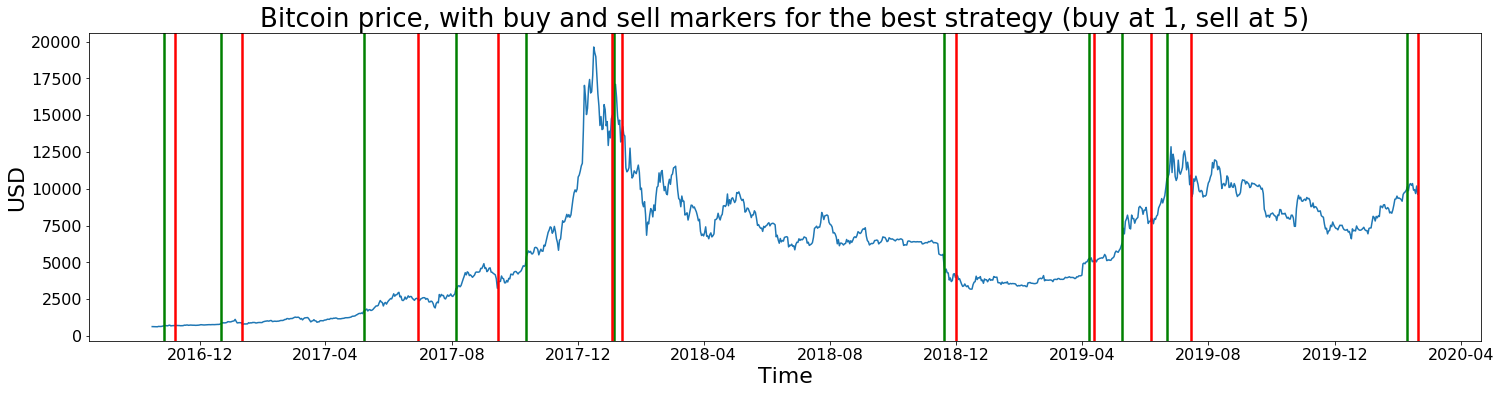

(11, 145.66147435691042, 100000.0) (22, 145.66147435691042, 102863.39719843102) 2863.397198431019
(66, 124.15862831638893, 102863.39719843102) (87, 124.15862831638893, 97876.06636950499) -4987.330828926031
(204, 58.08370465455196, 97876.06636950499) (256, 58.08370465455196, 147558.34274026912) 49682.27637076413
(293, 45.578945408618516, 147558.34274026912) (334, 45.578945408618516, 168606.68061398348) 21048.337873714365
(361, 31.260109056182518, 168606.68061398348) (444, 31.260109056182518, 469223.1823122214) 300616.5016982379
(446, 27.60586600687553, 469223.1823122214) (453, 27.60586600687553, 380669.5340960643) -88553.6482161571
(764, 79.4352348015114, 380669.5340960643) (776, 79.4352348015114, 329503.21036694146) -51166.323729122814
(904, 62.365479504069214, 329503.21036694146) (909, 62.365479504069214, 316491.7549253796) -13011.455441561877
(936, 49.782708975904015, 316491.7549253796) (964, 49.782708975904015, 399453.9723192372) 82962.2173938576
(979, 37.3835222721328, 399453.97231

In [23]:
money_big(tester, start_funds = start_funds, buy_on_x_day_with_bubbles=1, sell_on_x_day_without_bubbles=5, only=False)

In [ ]:
#btc, lbtc, miner, lminer
tester = btc["bsadfs"].values

#The holder
start_funds = 100000
hodler = (start_funds / data["BTCUSD"][-len(tester):].values[0]) * data["BTCUSD"][-len(tester):].values[-1]
print("The hodler: {0:.0%}".format(hodler/start_funds))

for i in range(1, 8):
    print("Buy at ", i, "day of bubble")
    print("Selling at: ", end="")
    for j in range(1, 8):
        print("\t\t {0}".format(j), end = "")
    print()
    print("ROI: \t", end="")
    for j in range(1, 8):
        #print("\t sell at ", j, "day of no bubble", end="")
        m = money_big(tester, start_funds = start_funds, buy_on_x_day_with_bubbles=i, sell_on_x_day_without_bubbles=j, only=True)
        print("\t\t{0:.0%}".format(m/start_funds), end="")
    print()

9 9 Total money:  219862.74982013868


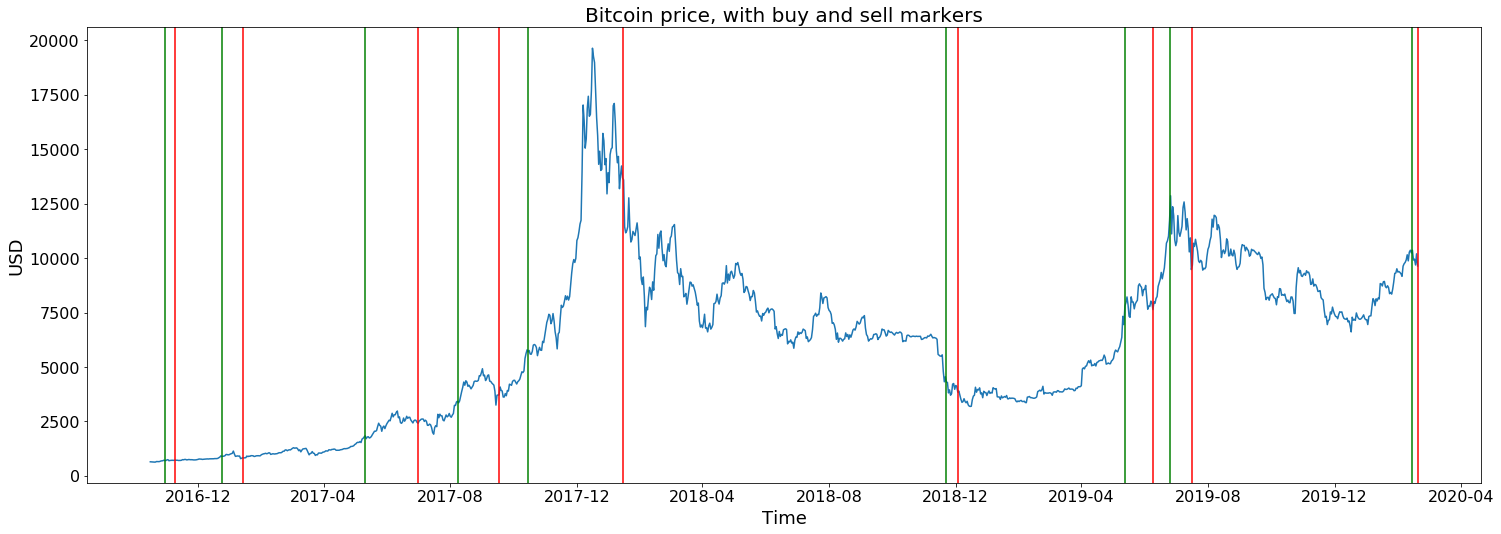

(14, 142.99331110001134, 99999.99999999999) (24, 142.99331110001134, 103169.88986936492) 3169.889869364939
(69, 115.77094711061459, 103169.88986936494) (89, 115.77094711061459, 95713.27480714704) -7456.6150622178975
(207, 52.145967920131845, 95713.27480714704) (258, 52.145967920131845, 125795.17116254028) 30081.89635539324
(296, 36.72126275814335, 125795.17116254028) (336, 36.72126275814335, 136304.04698658406) 10508.875824043775
(364, 23.955585160366645, 136304.04698658406) (455, 23.955585160366645, 327737.9287387415) 191433.88175215744
(767, 76.15409068131993, 327737.9287387415) (778, 76.15409068131993, 292734.54759828426) -35003.38114045723
(939, 37.53533604681544, 292734.54759828426) (966, 37.53533604681544, 286547.2233571563) -6187.324241127935
(982, 24.43636161455785, 286547.2233571563) (1004, 24.43636161455785, 236418.92639860997) -50128.29695854636
(1216, 22.81680130470807, 236418.92639860997) (1221, 22.81680130470807, 219862.74982013868) -16556.17657847129


In [25]:
money_big(tester, start_funds = start_funds, buy_on_x_day_with_bubbles=4, sell_on_x_day_without_bubbles=7, only=False)

In [28]:
def money(tester, buy_on_x_day_with_bubbles=0, sell_on_x_day_without_bubbles=0):
    # Aligning it
    critical = cv["bsadf_cv.95."].values
    price = data["BTCUSD"][-len(tester):].values
    dates = data["Date"][-len(tester):]
    dates = [datetime.datetime.strptime(d,'%Y-%m-%d').date() for d in dates]

    print(len(tester), len(critical))

    total_money = 0
    
    has_bitcoin = False
    bubble_yester_day = False
    days_with_bubble = 0
    days_without_bubble = 0

    buys = []
    sells = []

    for i in range(0, len(tester)):

        if tester[i] > critical[i]:
            days_with_bubble = days_with_bubble + 1
            days_without_bubble = 0
        else:
            days_without_bubble = days_without_bubble + 1
            days_with_bubble = 0        
        
        if tester[i] > critical[i] and not(has_bitcoin) and days_with_bubble >= buy_on_x_day_with_bubbles:
            has_bitcoin = True
            total_money = total_money - price[i]
            buys.append((i, price[i]))

        if tester[i] < critical[i] and has_bitcoin and days_without_bubble >= sell_on_x_day_without_bubbles:
            has_bitcoin = False
            total_money = total_money + price[i]
            sells.append((i, price[i]))


    if has_bitcoin:
        total_money = total_money + price[i]
        sells.append((i, price[i]))

    print(len(buys), len(sells), "Total money: ", total_money)
    
    plt.figure(figsize=(21, 7))
    plt.plot(tester, label="Tester")
    plt.plot(critical, label="CV")
    plt.show()
    
    plt.figure(figsize=(21, 7))
    #plt.plot(tester, label="Tester")
    #plt.plot(critical, label="CV")
    plt.plot(dates, price, label= "Price")

    for buy in buys:
        plt.axvline(x = dates[buy[0]], color='g')

    for sell in sells:
        plt.axvline(x = dates[sell[0]], color='r')

    plt.legend()
    plt.show()
    
    for i in range(0, len(buys)):
        print(buys[i], sells[i], sells[i][1] -  buys[i][1])


1222 1298
26 26 Total money:  -164.96641616014858


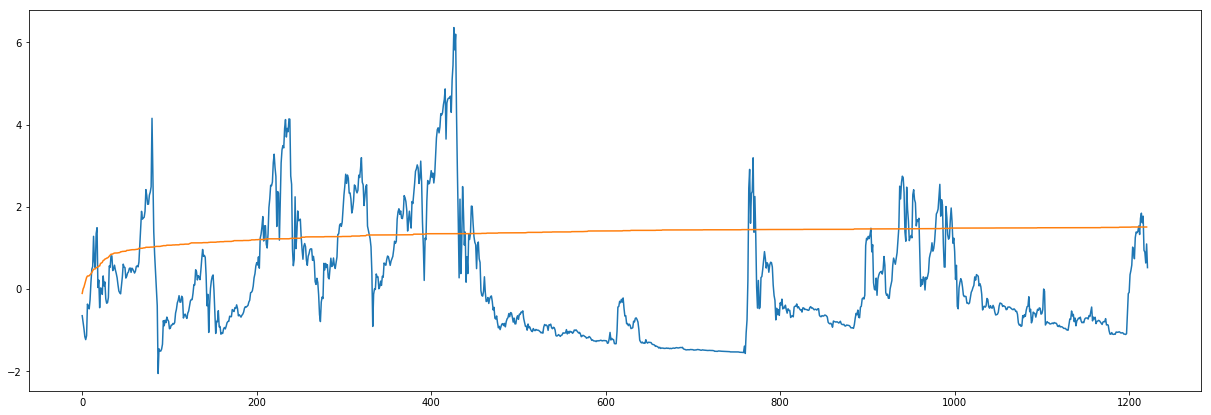

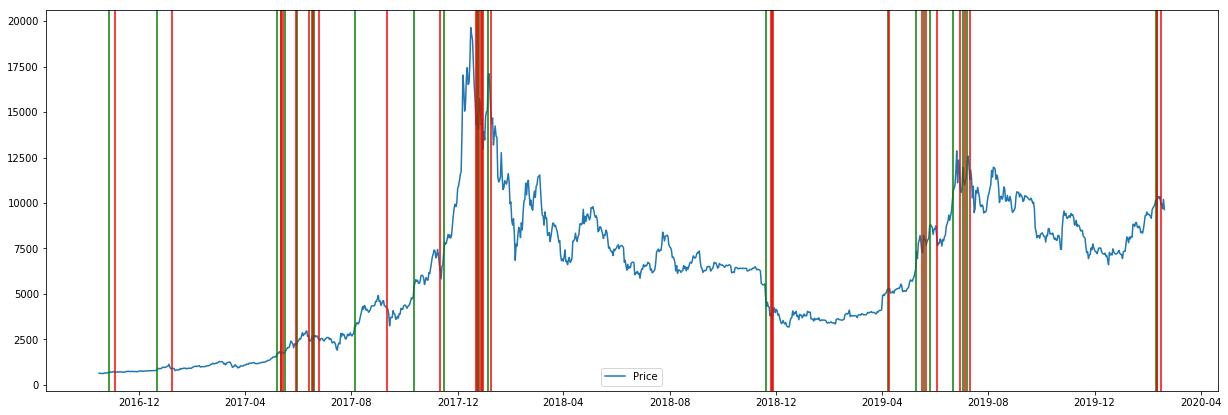

(11, 686.523327060199) (18, 689.939206954997) 3.4158798947979676
(66, 828.4836792518998) (83, 903.4532836353007) 74.9696043834009
(204, 1685.0864963179401) (208, 1704.6616410870802) 19.575144769140024
(209, 1779.8402566919901) (211, 1736.88284611338) -42.95741057861005
(213, 1808.74606469901) (226, 2167.2644779076604) 358.5184132086504
(227, 2299.43261025716) (241, 2443.8244513734694) 144.39184111630948
(244, 2652.75536335476) (245, 2508.2142074225603) -144.54115593219967
(246, 2589.6422133839897) (252, 2497.72894137931) -91.91327200467958
(293, 3237.42336329632) (330, 4212.54757334892) 975.1242100526001
(361, 5393.66898275862) (391, 6346.72144915254) 953.0524663939204
(395, 7257.373212156641) (432, 14305.718343658702) 7048.345131502061
(433, 14910.8581049094) (434, 14026.3468661601) -884.5112387492991
(436, 15727.1454792519) (438, 14289.452209526598) -1437.6932697253014
(439, 14571.7460821157) (440, 12948.7158828171) -1623.0301992986006
(446, 16997.2274079486) (449, 14937.415089421398

In [30]:
#btc, lbtc, miner, lminer
tester = btc["x"].values
money(tester, buy_on_x_day_with_bubbles=1, sell_on_x_day_without_bubbles=1)

1222 1298
7 7
Total money:  1971.2655068965341
(14, 699.333410987726) (15, 698.897727995325) -0.4356829924009844
(71, 903.2012466393919) (81, 1000.49812893045) 97.29688229105807
(222, 2279.4185836353) (223, 2044.30049982466) -235.11808381063997
(231, 2524.9938335476295) (241, 2443.8244513734694) -81.16938217416009
(414, 11562.1285669199) (434, 14026.3468661601) 2464.2182992401995
(770, 3946.8508743424895) (773, 4208.475269140849) 261.62439479835984
(942, 7862.07160233782) (943, 7326.920681881938) -535.1509204558815


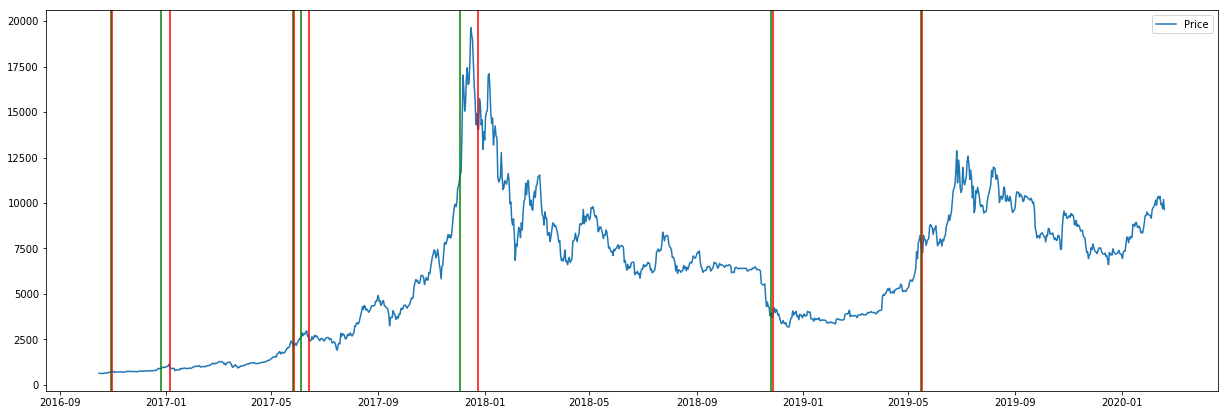

In [23]:
# Aligning it
#btc, lbtc, miner, lminer
tester = btc["bsadfs"].values
critical = cv["bsadf_cv.95."].values
price = data["BTCUSD"][-len(tester):].values
dates = data["Date"][-len(tester):]
dates = [datetime.datetime.strptime(d,'%Y-%m-%d').date() for d in dates]

print(len(tester), len(critical))

total_money = 0
has_bitcoin = False
bubble_yester_day = False
days_with_bubble = 0

buys = []
sells = []

for i in range(0, len(tester)):
    
    if tester[i] > critical[i] and not(has_bitcoin) and days_with_bubble > 2:
        has_bitcoin = True
        total_money = total_money - price[i]
        buys.append((i, price[i]))
    
    if tester[i] < critical[i] and has_bitcoin:
        has_bitcoin = False
        total_money = total_money + price[i]
        sells.append((i, price[i]))
    
    if tester[i] > critical[i]:
        days_with_bubble = days_with_bubble + 1
    else:
        days_with_bubble = 0
    
if has_bitcoin:
    total_money = total_money + price[i]
    total_money = total_money + price[i]
    sells.append((i, price[i]))
    
print(len(buys), len(sells))
print("Total money: ", total_money)

for i in range(0, len(buys)):
    print(buys[i], sells[i], sells[i][1] -  buys[i][1])


plt.figure(figsize=(21, 7))
#plt.plot(tester, label="Tester")
#plt.plot(critical, label="CV")
plt.plot(dates, price, label= "Price")

for buy in buys:
    plt.axvline(x = dates[buy[0]], color='g')
    
for sell in sells:
    plt.axvline(x = dates[sell[0]], color='r')

plt.legend()
plt.show()